In [1]:
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import os
import datetime as dt
from datetime import datetime,timedelta
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 24
mpl.rcParams["axes.titlesize"] = 24
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 22
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 17
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
RESULTS_DIR = os.path.join(ROOT_DIR, "results")
RESULTS_DIR_F = os.path.join(ROOT_DIR, "results_filtered")


In [2]:
def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y) - 1):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

def prepare_topics(dfa,lag,threshold):
    df=dfa.copy()

    # padding empty columns, sorting columns
    for i in range(0,100):
        if f"Topic_{i}" not in df.columns:
            df[f"Topic_{i}"] = 0
    df = df[df.columns[df.columns.str[6:].astype(float).argsort()]]

    dataframe=df

    for i in range(0,100):
        arr = df.to_numpy()
        y = arr[:,i]

        result = thresholding_algo(y, lag, threshold, influence=0)
        avg_filter = result["avgFilter"]
        threshold_filter = result["avgFilter"] + threshold * result["stdFilter"]
        signals = result["signals"]
        
        for j in range(0,len(signals)):
            if signals[j] < 1:
                signals[j] = -5
            else:
                signals[j] = y[j]

        dataframe[f"avg_filter_topic_{i}"] = avg_filter
        dataframe[f"threshold_filter_topic_{i}"] = threshold_filter
        dataframe[f"signals_topic_{i}"] = signals
        dataframe[f"y_{i}"] = y

    return dataframe
    

In [3]:
def peaks_plot(source,df,lag,threshold,topic):

    title=f"Peak Detection - Topic {topic}"
    topic_data = prepare_topics(df,lag,threshold)

    avg_filter = topic_data[f"avg_filter_topic_{topic}"]
    threshold_filter = topic_data[f"threshold_filter_topic_{topic}"]
    signals = topic_data[f"signals_topic_{topic}"]
    y = topic_data[f"y_{topic}"]

    fig, ax = plt.subplots(figsize=(25, 3.5))
    beginning = dt.date(2022, 1, 1)
    end = dt.date(2023,1,1)

    ax.plot(topic_data.index.values, avg_filter, color='cyan', linewidth=1, alpha=1)
    ax.plot(topic_data.index.values, threshold_filter, color='lime', linewidth=1, alpha=1)
    ax.plot(topic_data.index.values, y, color='k', linewidth=1, alpha=1)
    ax.scatter(topic_data.index.values, signals, color='red', s=10, alpha=1)

    ax.set(title=title, xbound=(beginning, end), ylim=(0))

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()

    ax.yaxis.set_major_locator(LinearLocator(5))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")

    return fig

In [4]:
kwargs2 = {
    "All":[
    {"topic":2,"lag":240,"threshold":5},
    {"topic":3,"lag":300,"threshold":5}, #
    {"topic":4,"lag":235,"threshold":5}, #
    {"topic":6,"lag":240,"threshold":5},
    {"topic":7,"lag":300,"threshold":5},
    {"topic":9,"lag":190,"threshold":5},
    {"topic":10,"lag":300,"threshold":5}, #
    {"topic":11,"lag":235,"threshold":5}, #
    {"topic":14,"lag":240,"threshold":5},
    {"topic":17,"lag":240,"threshold":6}, #
    {"topic":19,"lag":243,"threshold":5},
    {"topic":20,"lag":290,"threshold":5}, #
    {"topic":21,"lag":235,"threshold":5},
    {"topic":22,"lag":240,"threshold":7}, #
    {"topic":24,"lag":230,"threshold":6},
    {"topic":25,"lag":240,"threshold":9},
    {"topic":29,"lag":235,"threshold":9},
    {"topic":30,"lag":340,"threshold":7},
    {"topic":33,"lag":240,"threshold":7},
    {"topic":34,"lag":250,"threshold":5},
    {"topic":35,"lag":195,"threshold":2},
    {"topic":38,"lag":239,"threshold":5},
    {"topic":39,"lag":250,"threshold":8},
    {"topic":43,"lag":241,"threshold":4},
    {"topic":44,"lag":235,"threshold":5},
    {"topic":46,"lag":250,"threshold":5},
    {"topic":47,"lag":240,"threshold":5},
    {"topic":50,"lag":235,"threshold":6},
    {"topic":51,"lag":258,"threshold":5},
    {"topic":52,"lag":243,"threshold":5},
    {"topic":54,"lag":240,"threshold":6},
    {"topic":55,"lag":270,"threshold":10}, # 
    {"topic":56,"lag":440,"threshold":5},
    {"topic":57,"lag":238,"threshold":6},
    {"topic":58,"lag":239,"threshold":4}, #
    {"topic":59,"lag":238,"threshold":5},
    {"topic":60,"lag":470,"threshold":5},
    {"topic":61,"lag":240,"threshold":5},
    {"topic":63,"lag":445,"threshold":8},
    {"topic":65,"lag":230,"threshold":6},
    {"topic":66,"lag":240,"threshold":5},
    {"topic":70,"lag":280,"threshold":9},
    {"topic":72,"lag":290,"threshold":5},
    {"topic":73,"lag":240,"threshold":6},
    {"topic":75,"lag":190,"threshold":6},
    {"topic":79,"lag":240,"threshold":6},
    {"topic":80,"lag":210,"threshold":5},
    {"topic":81,"lag":238,"threshold":14},
    {"topic":82,"lag":240,"threshold":5},
    {"topic":84,"lag":330,"threshold":5},
    {"topic":86,"lag":270,"threshold":6},
    {"topic":95,"lag":240,"threshold":5},
    {"topic":96,"lag":247,"threshold":5},
    {"topic":97,"lag":240,"threshold":3},
    {"topic":98,"lag":218,"threshold":6}, #
    {"topic":99,"lag":240,"threshold":5},
    ]
}


/var/folders/xd/g9cbpcws3m14495hf_1bxjyh0000gn/T/ipykernel_10394/159145235.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(25, 3.5))


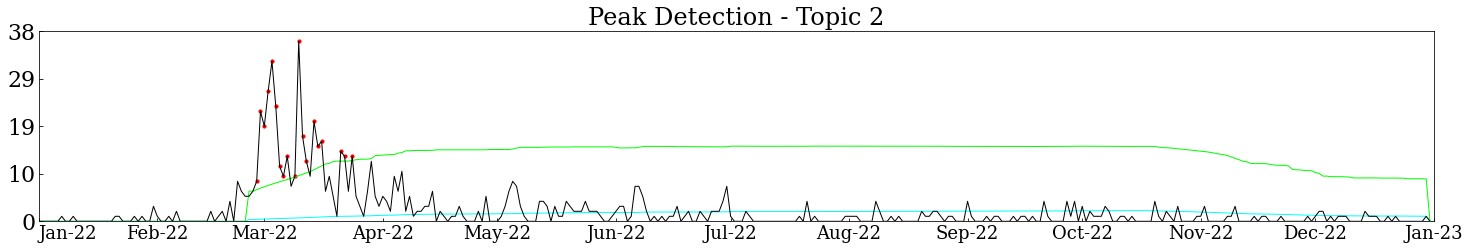

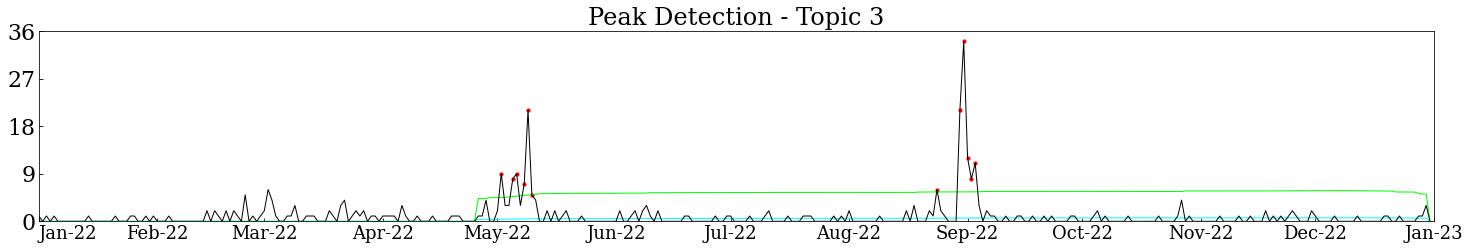

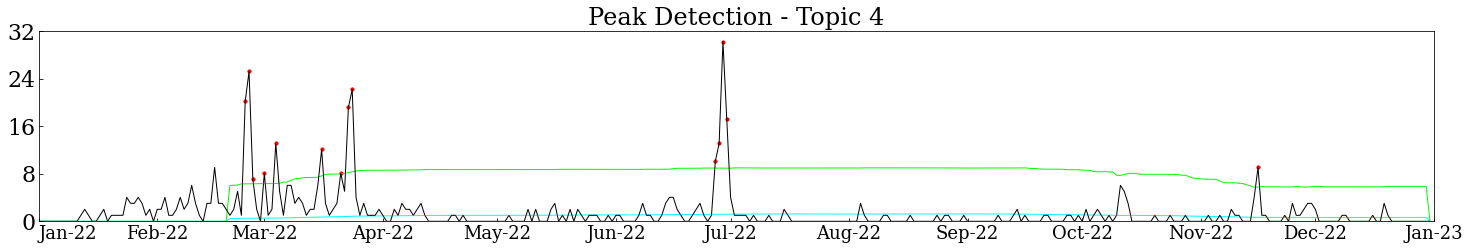

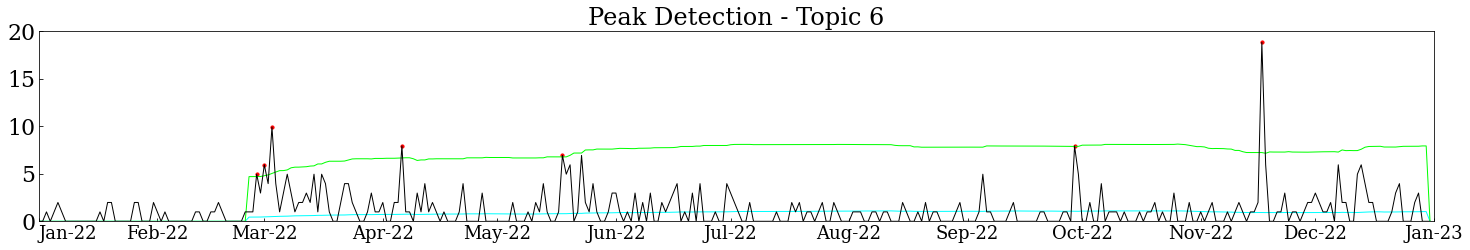

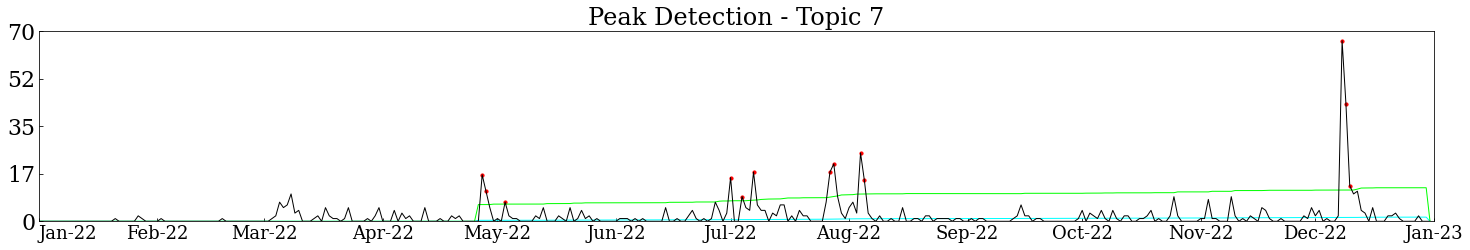

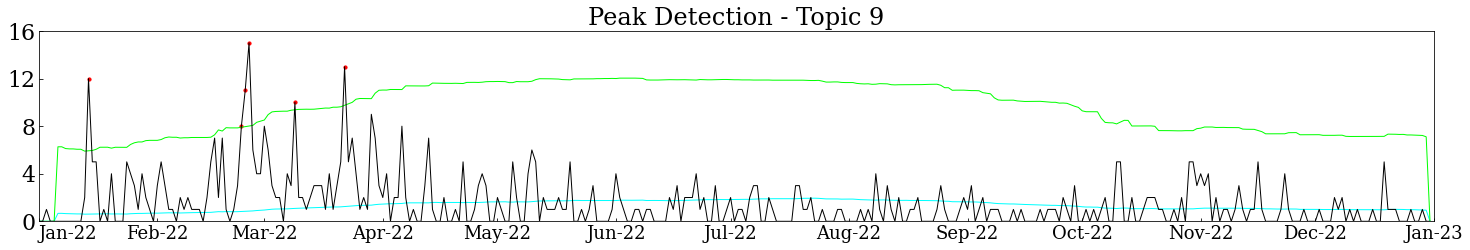

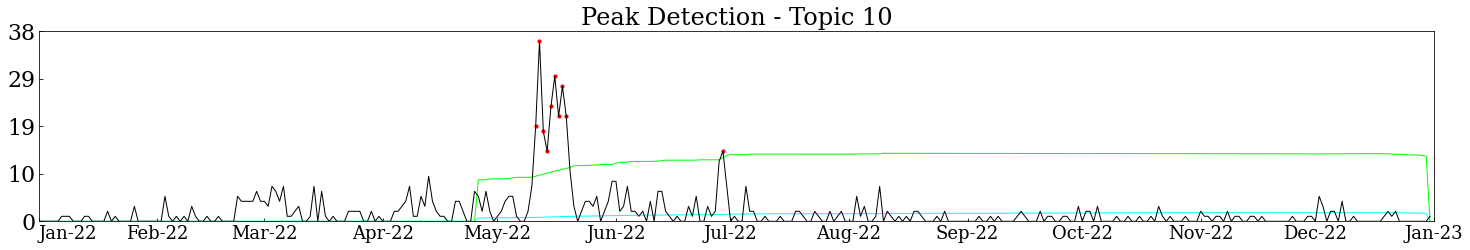

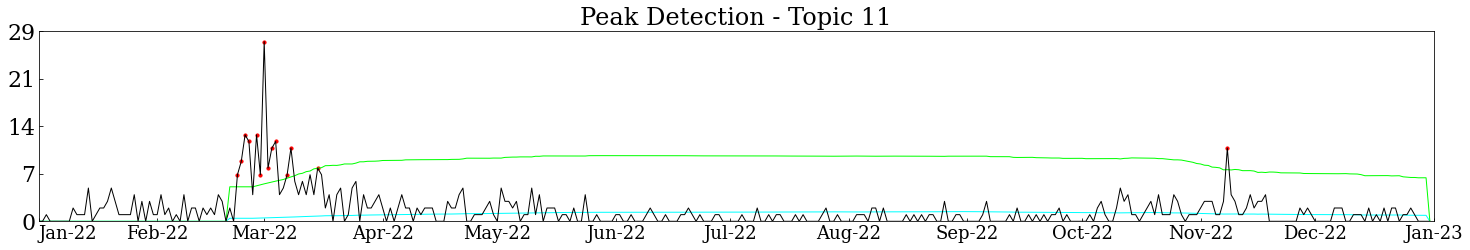

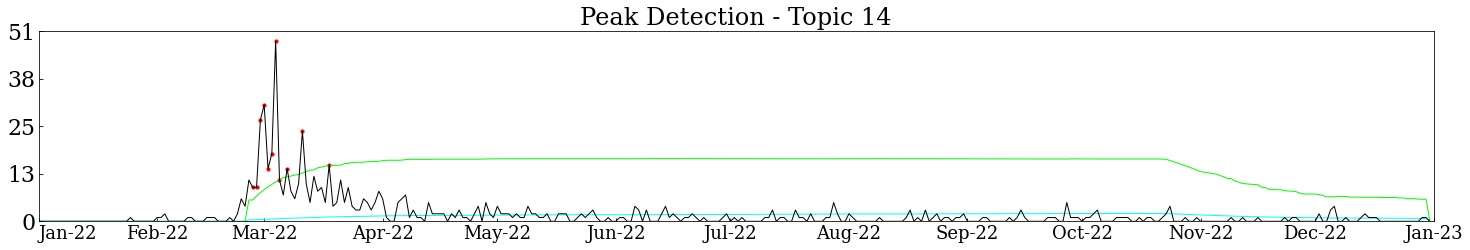

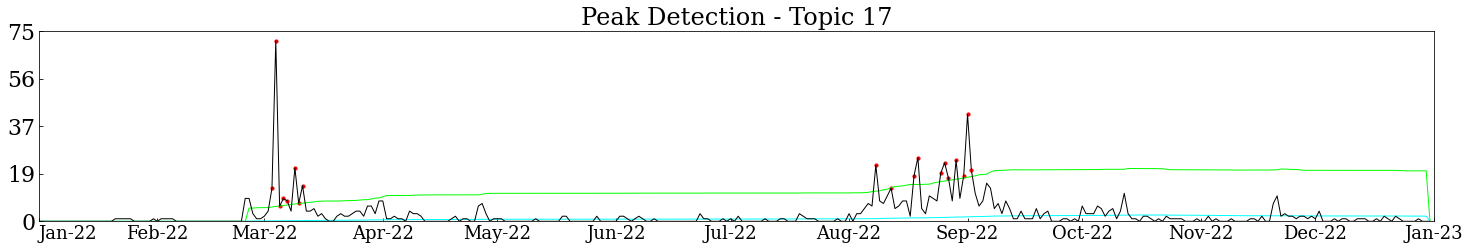

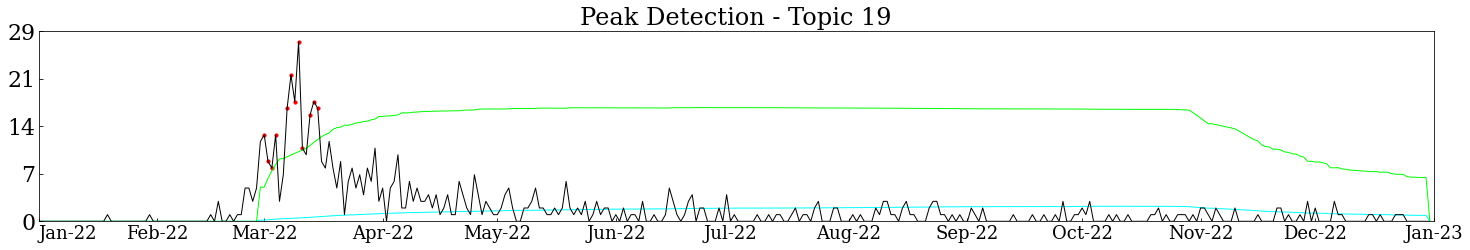

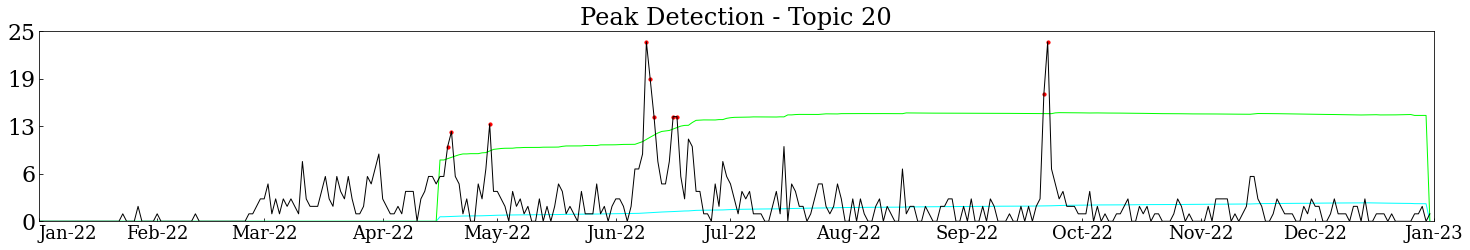

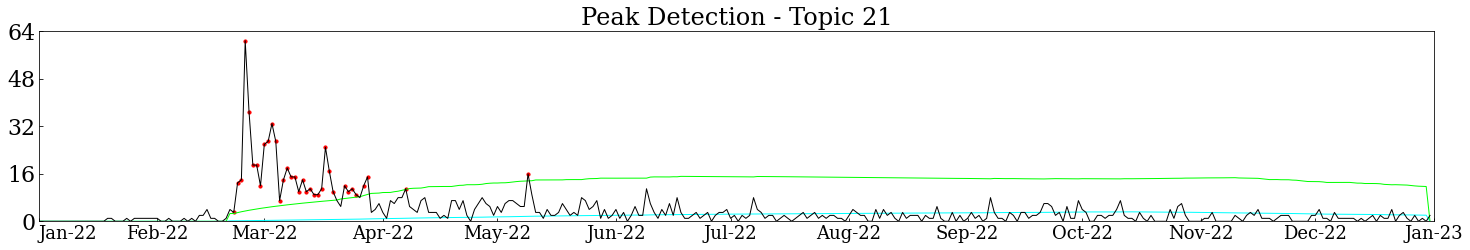

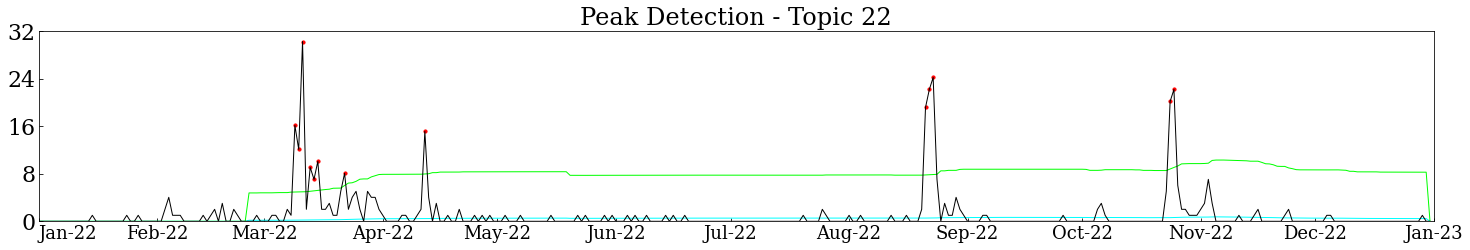

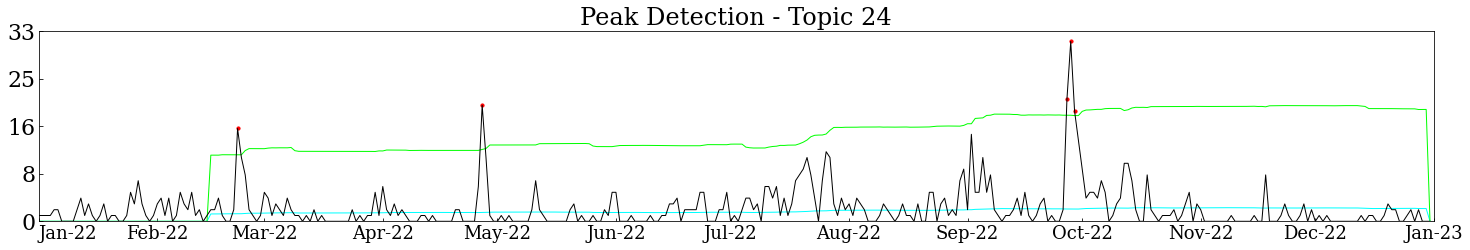

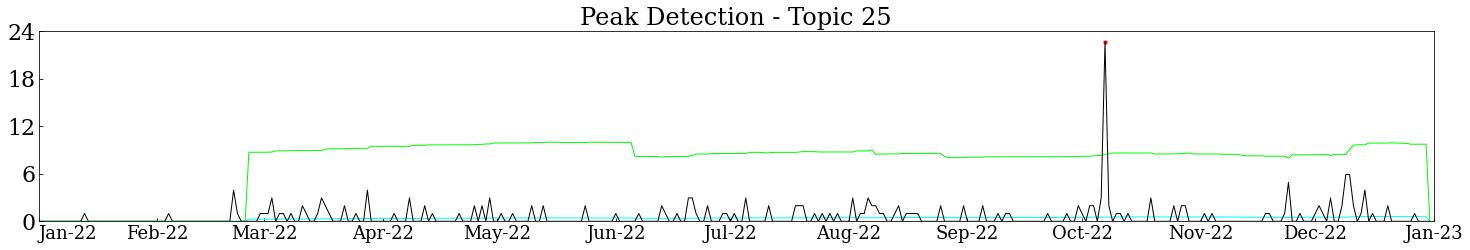

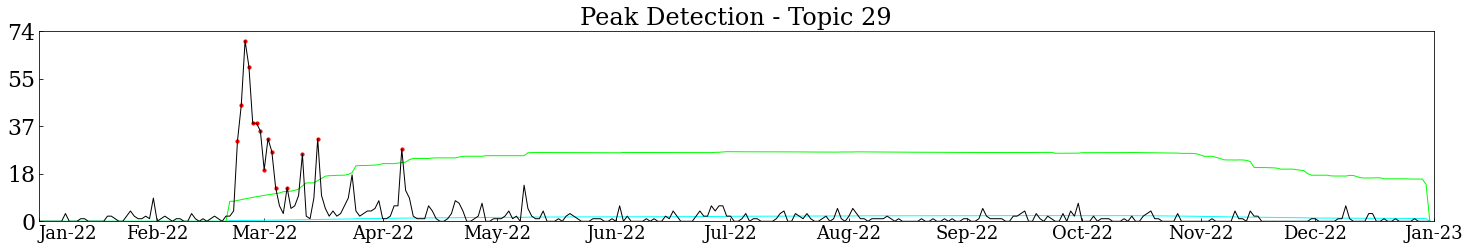

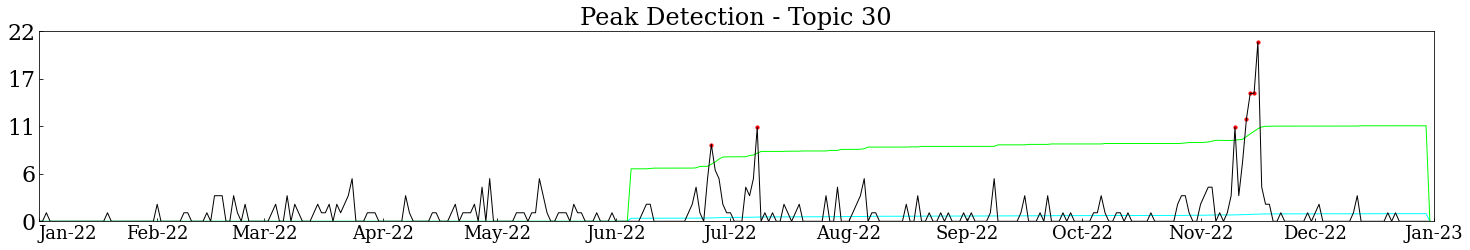

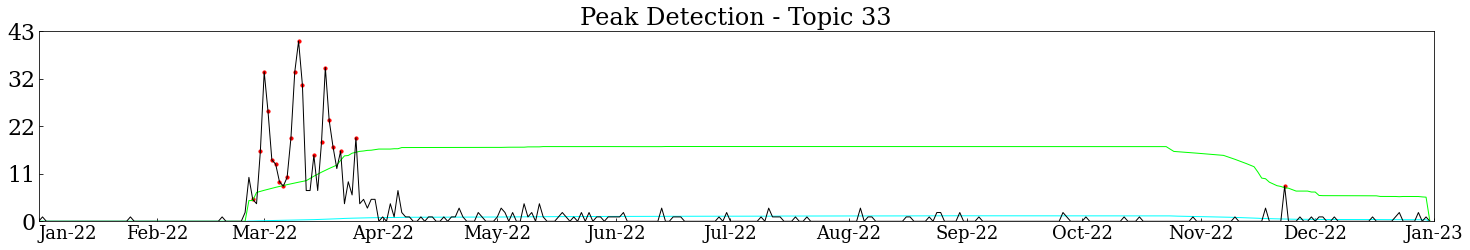

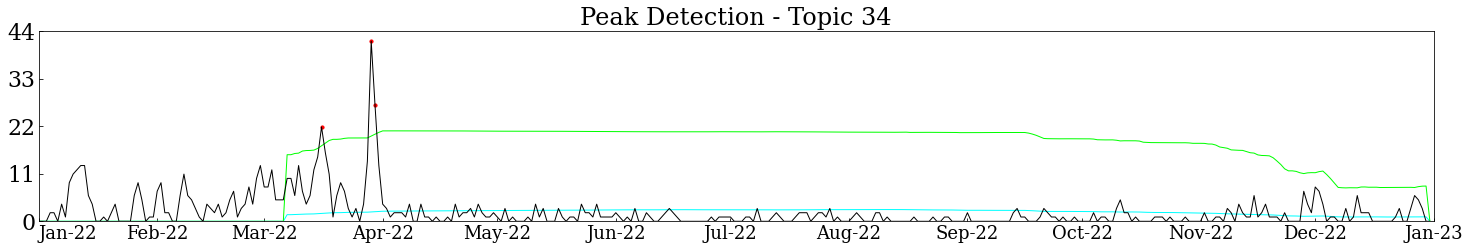

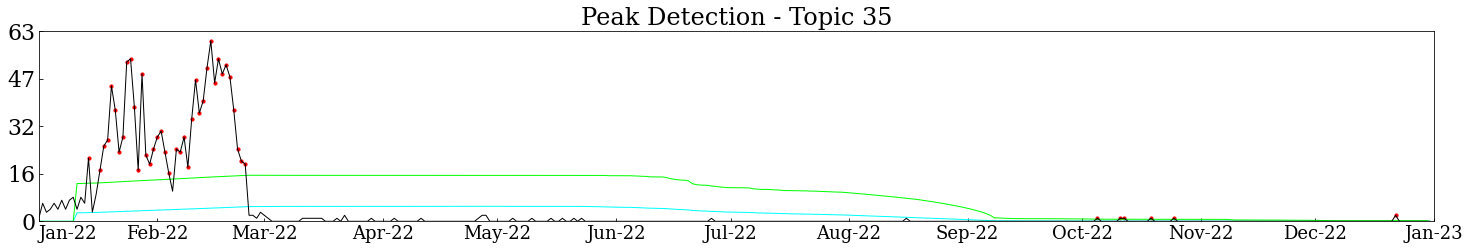

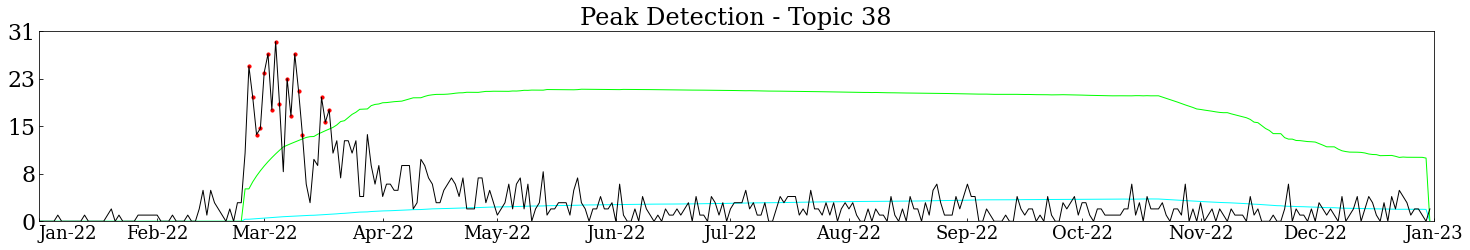

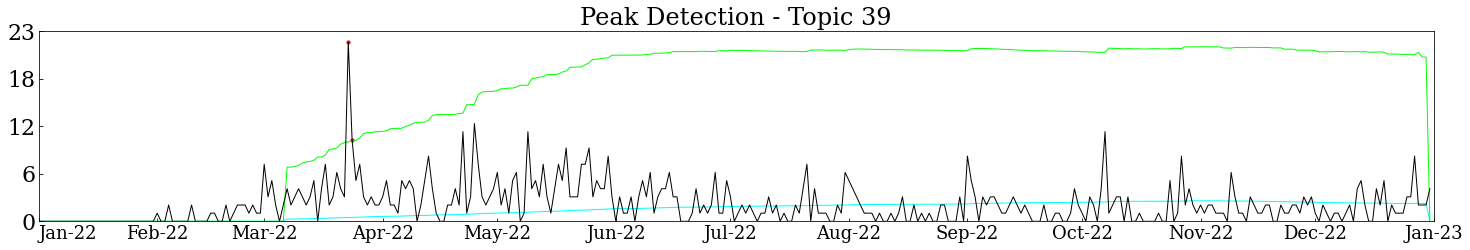

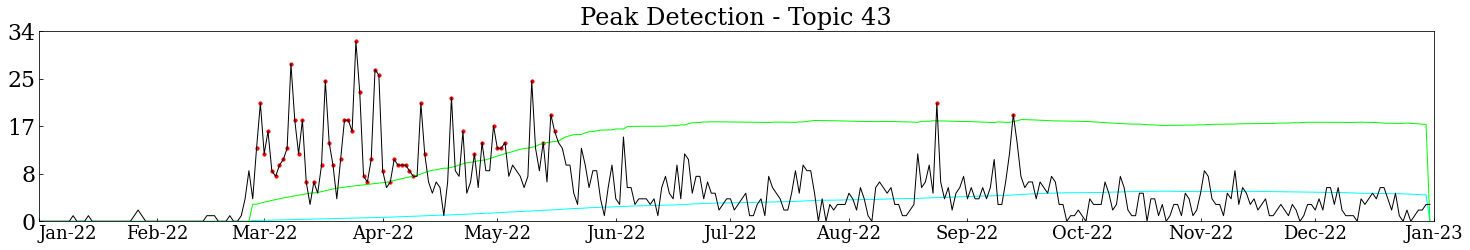

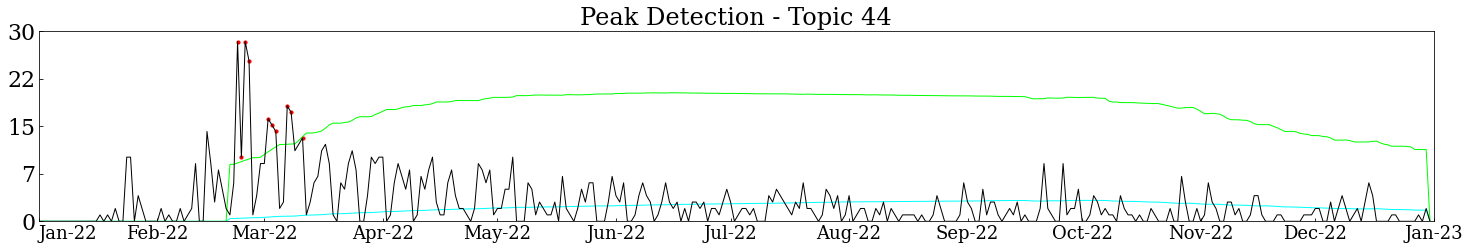

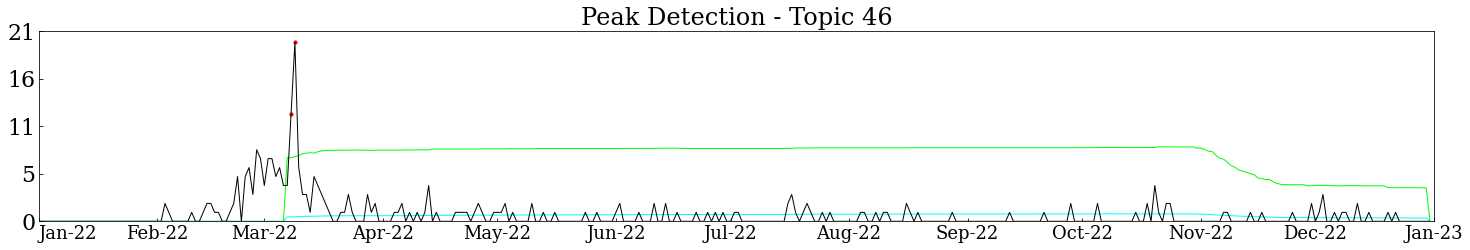

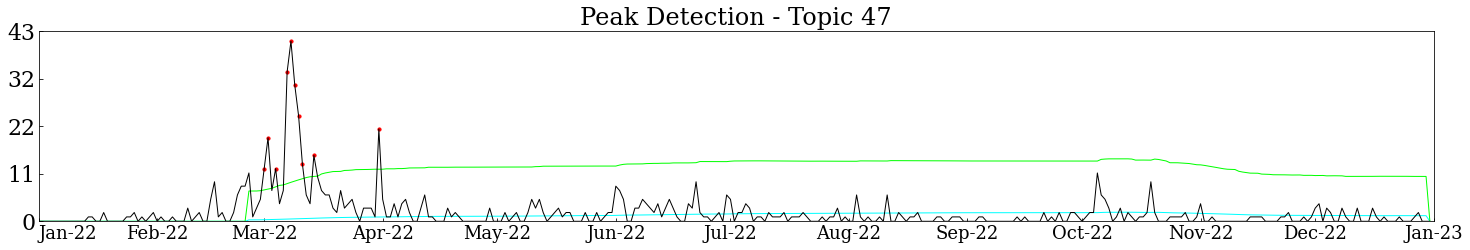

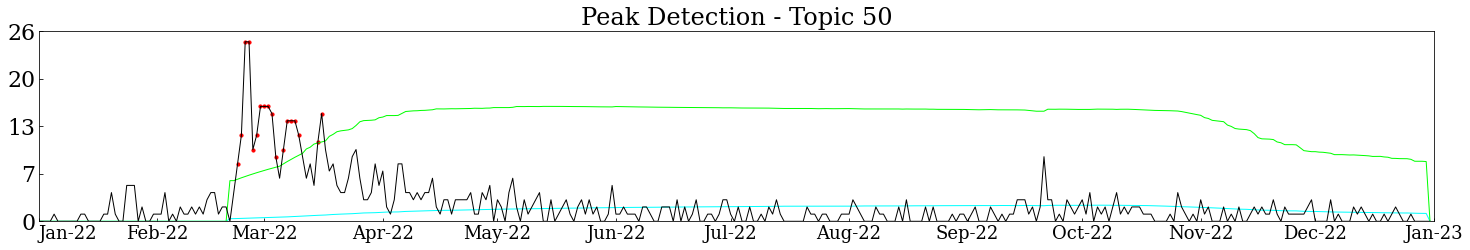

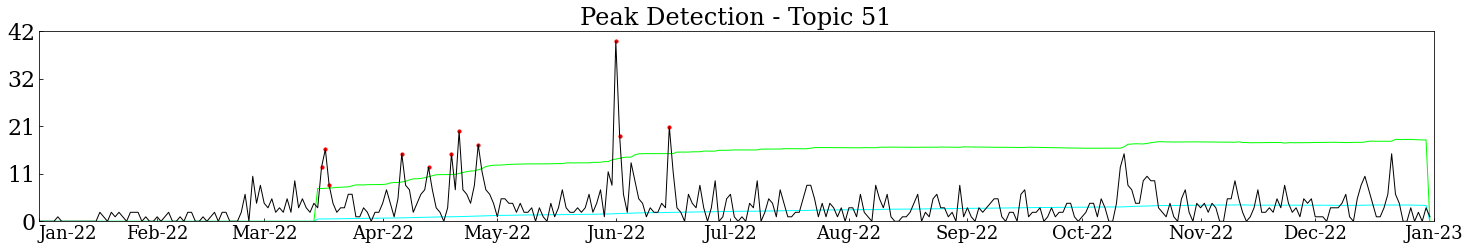

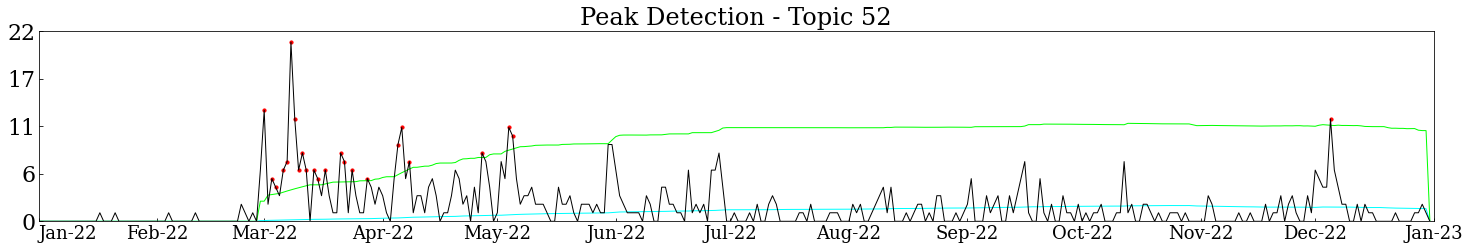

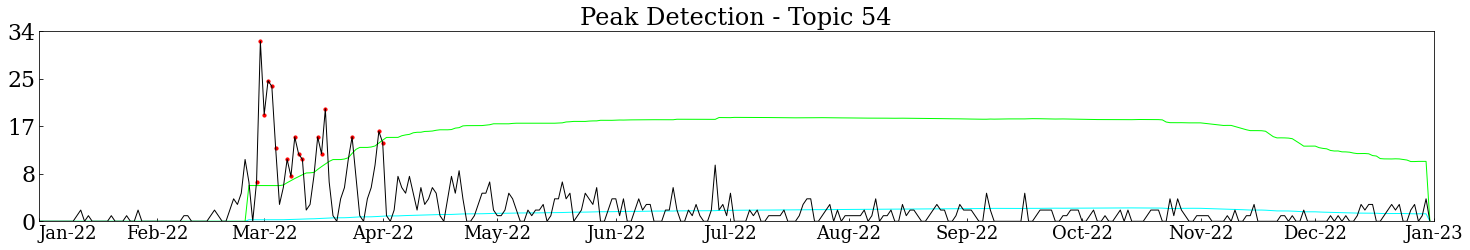

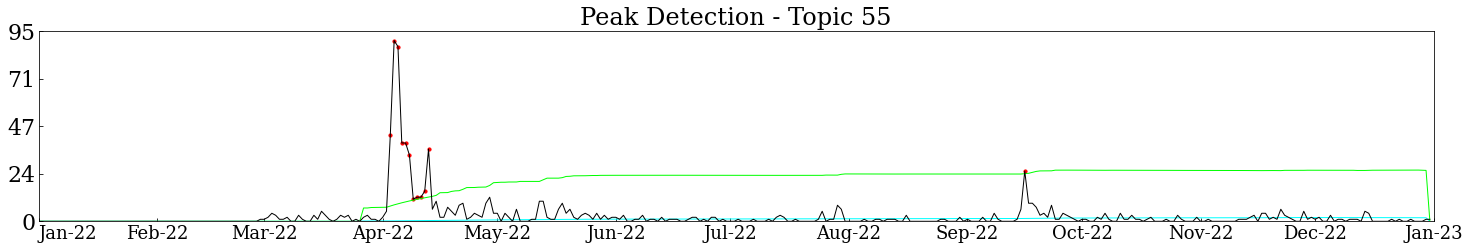

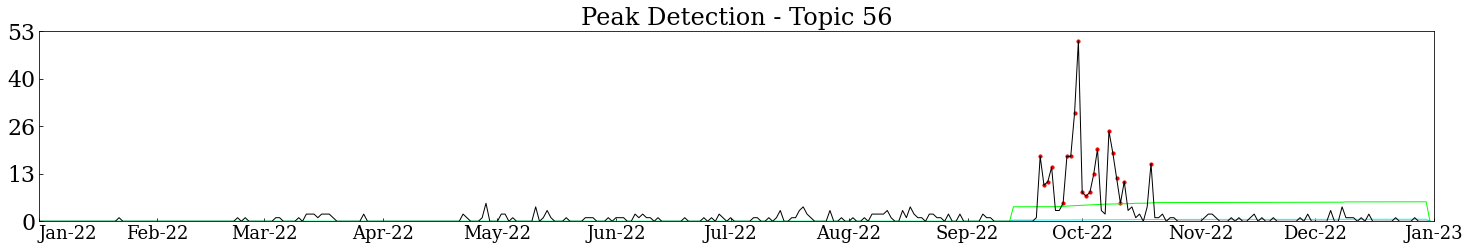

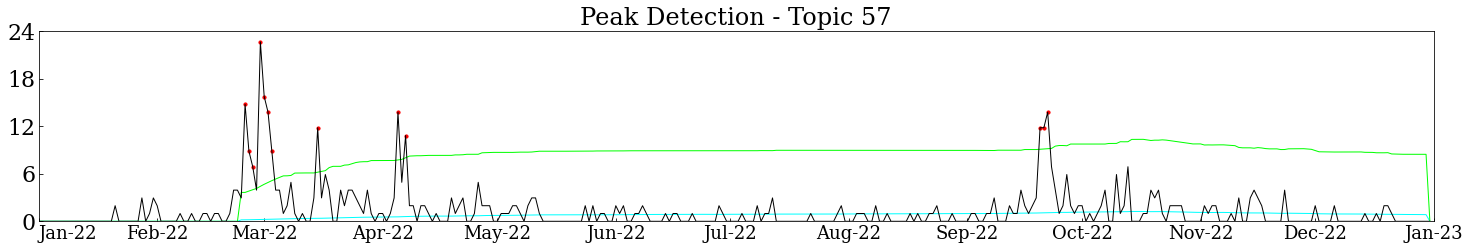

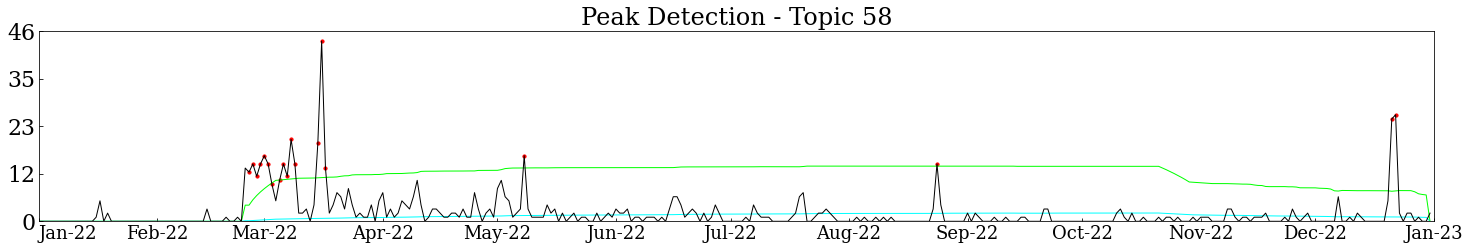

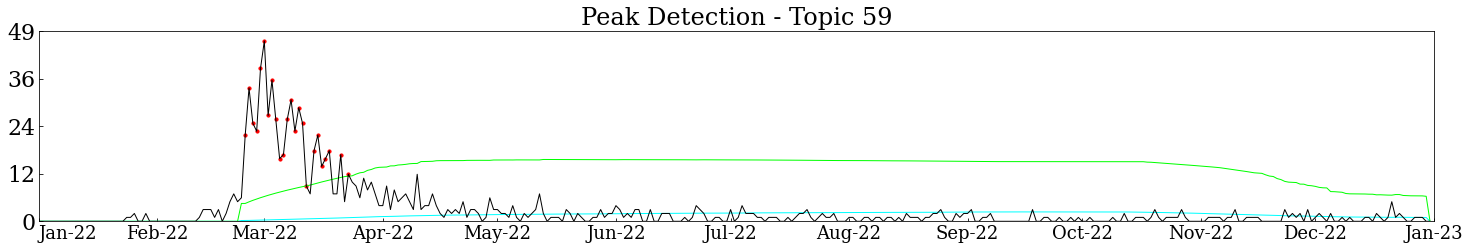

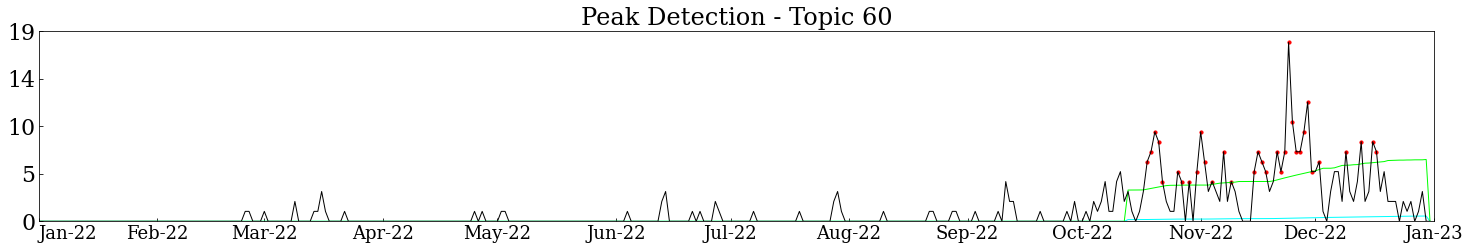

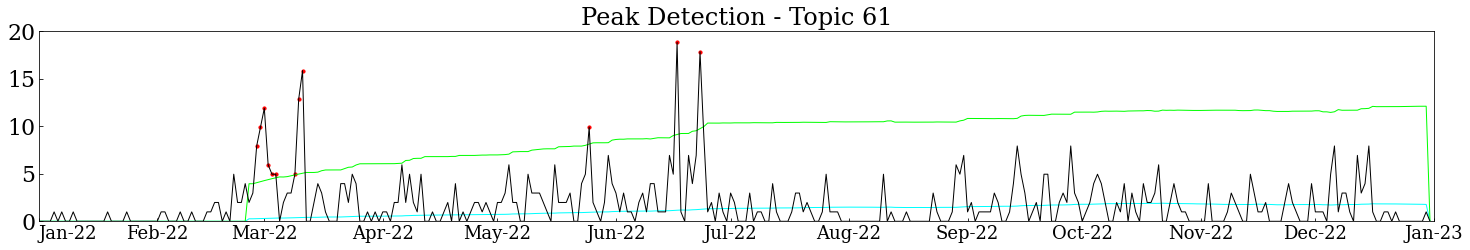

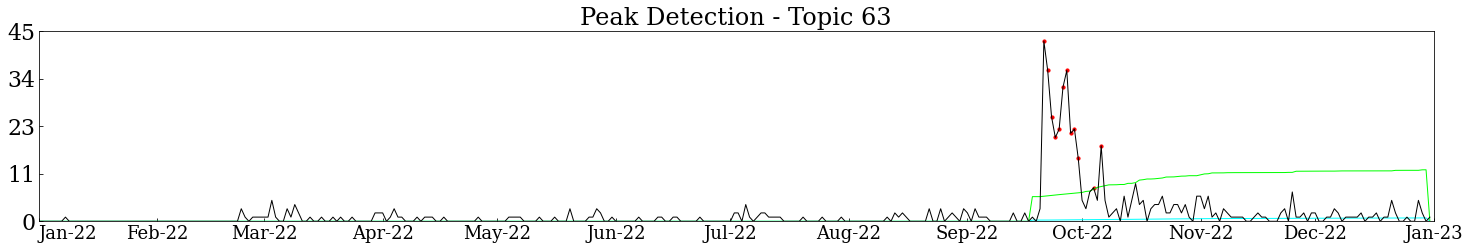

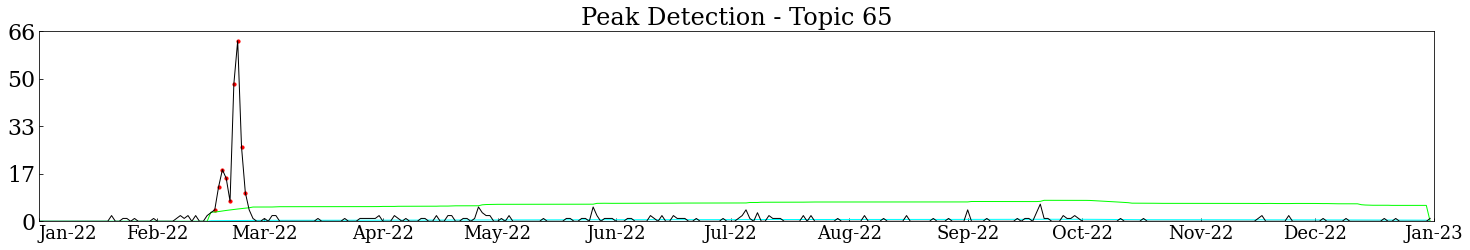

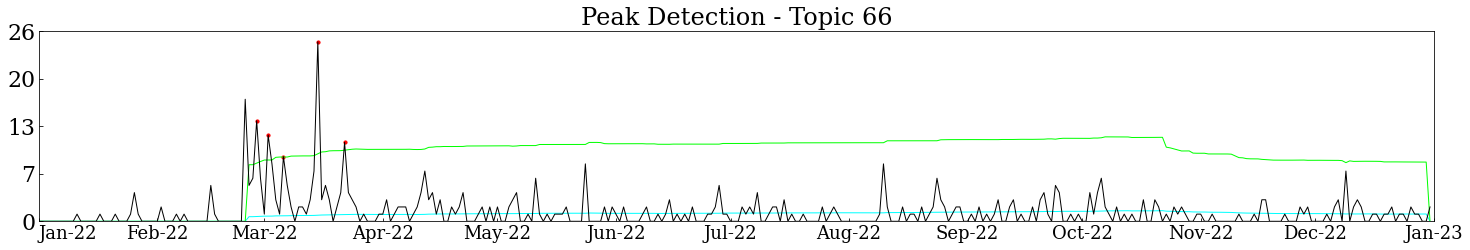

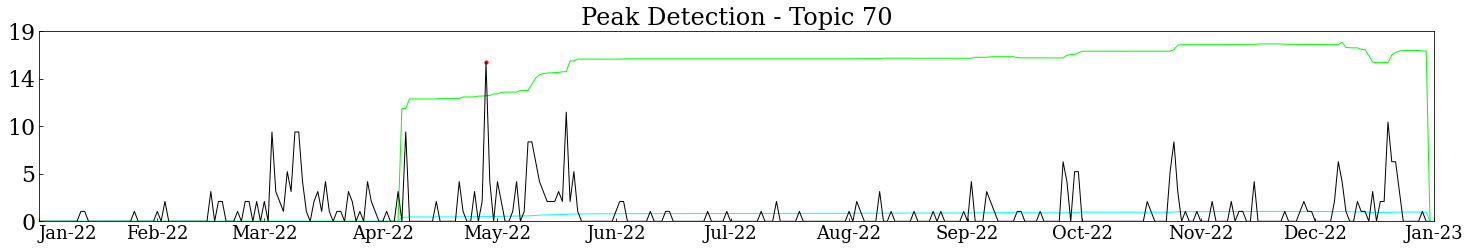

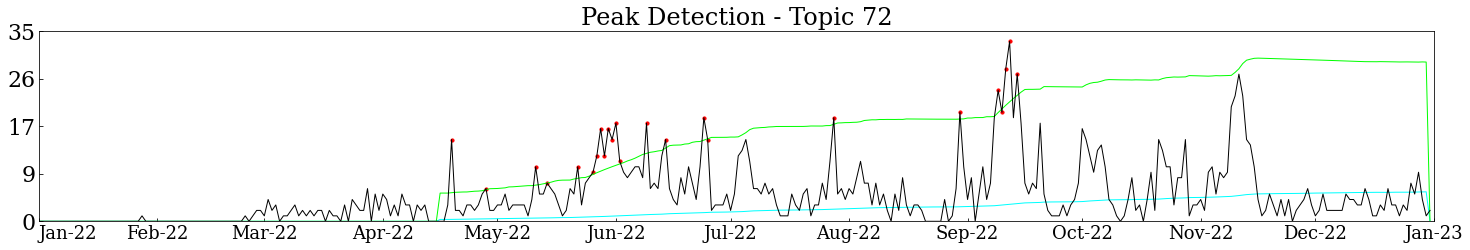

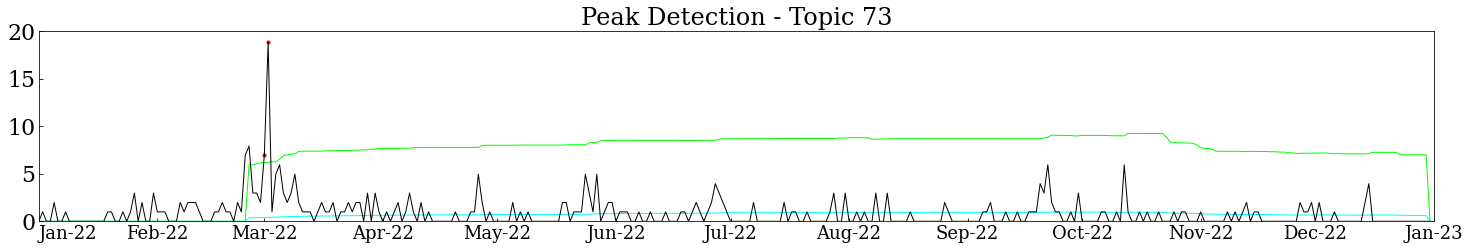

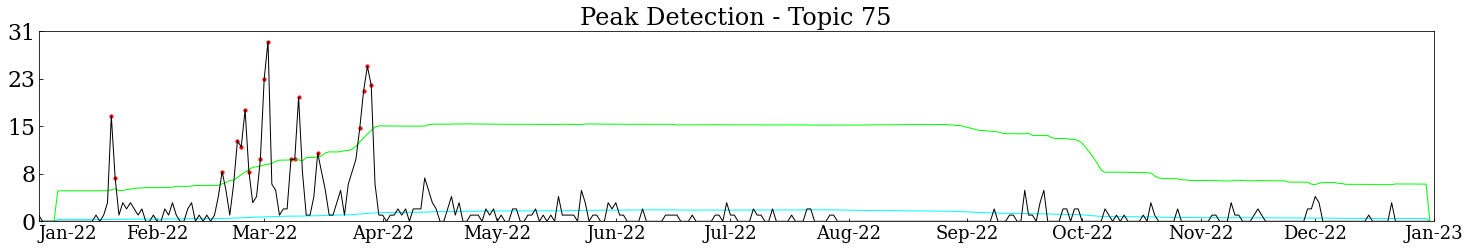

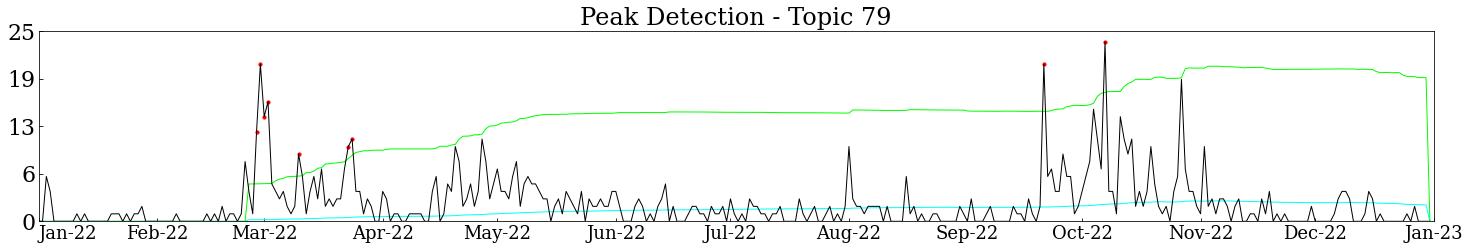

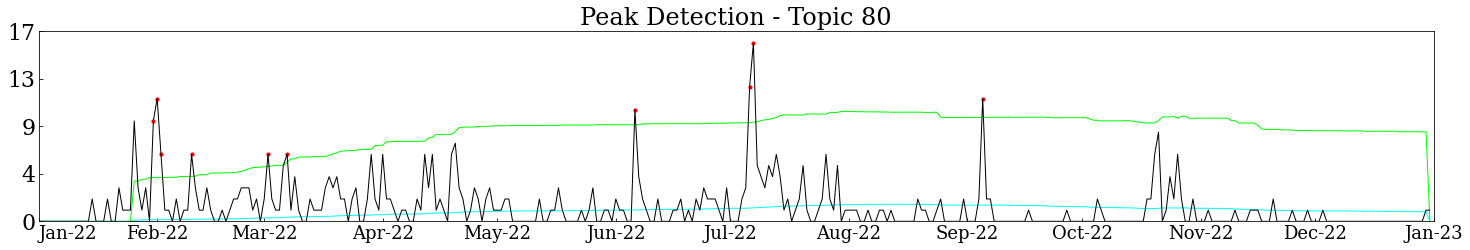

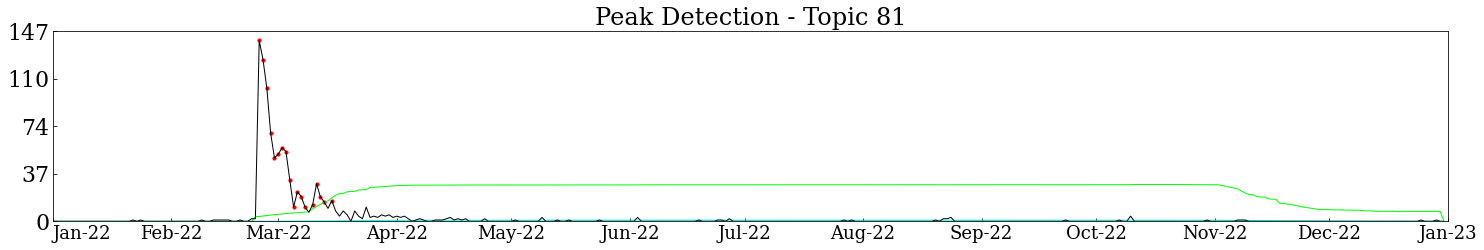

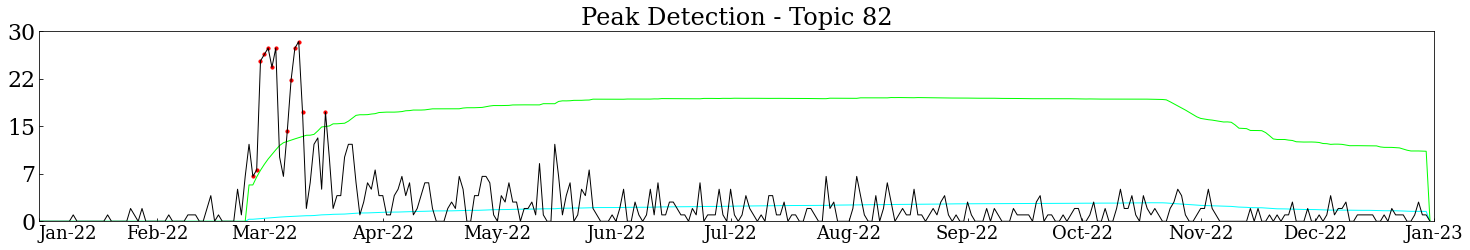

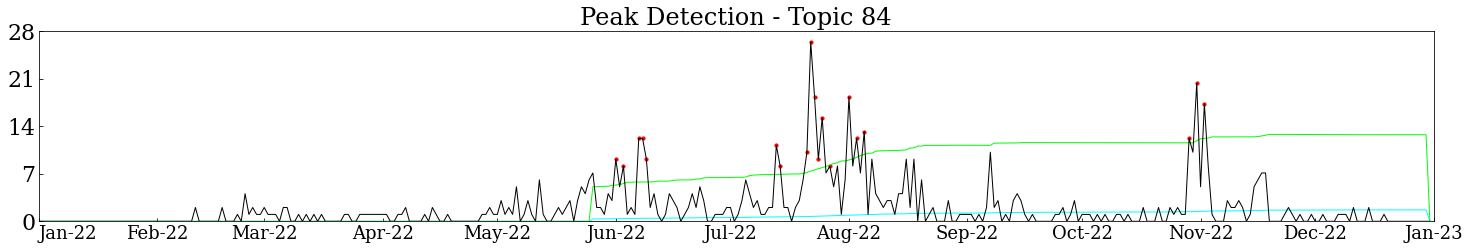

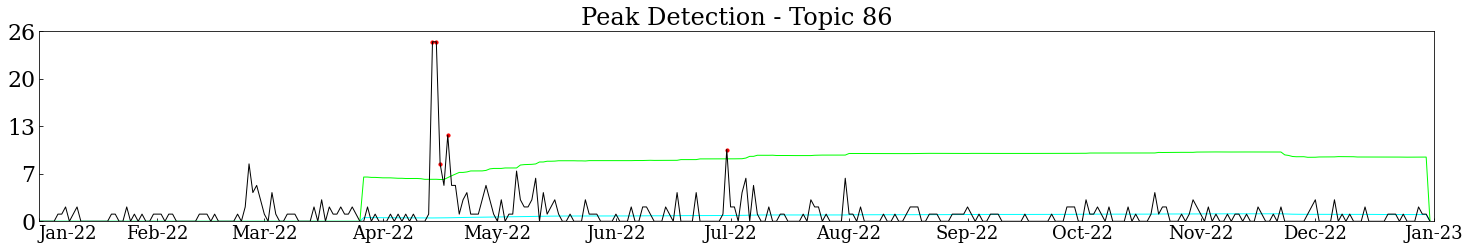

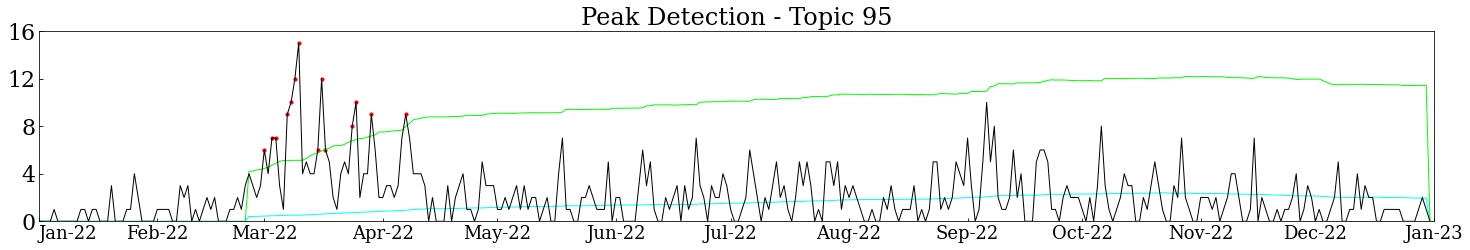

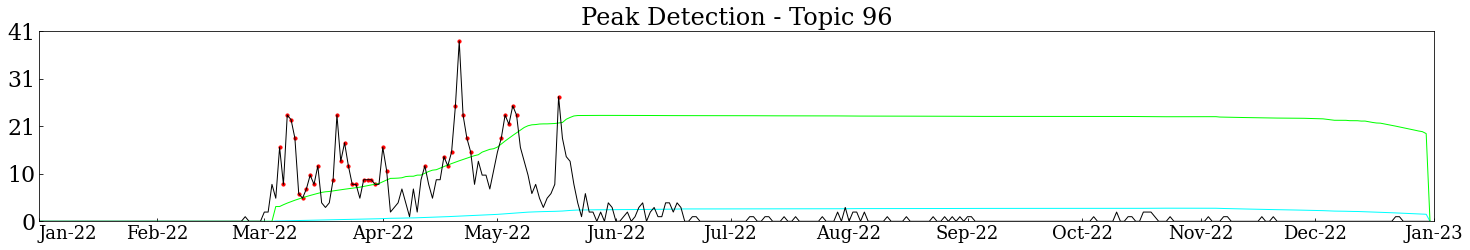

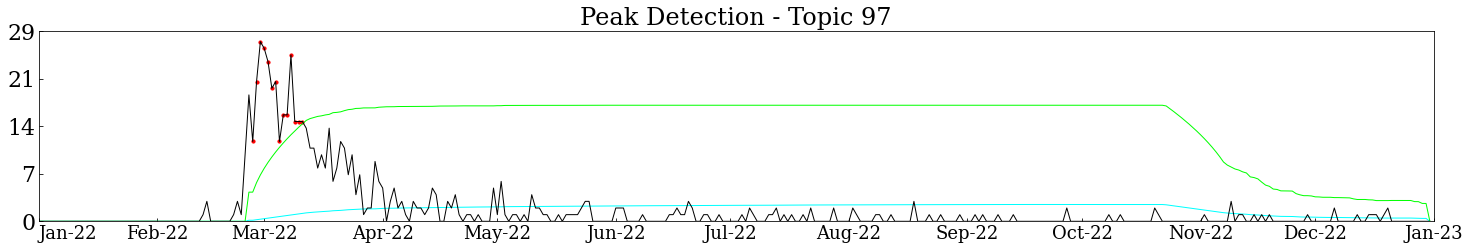

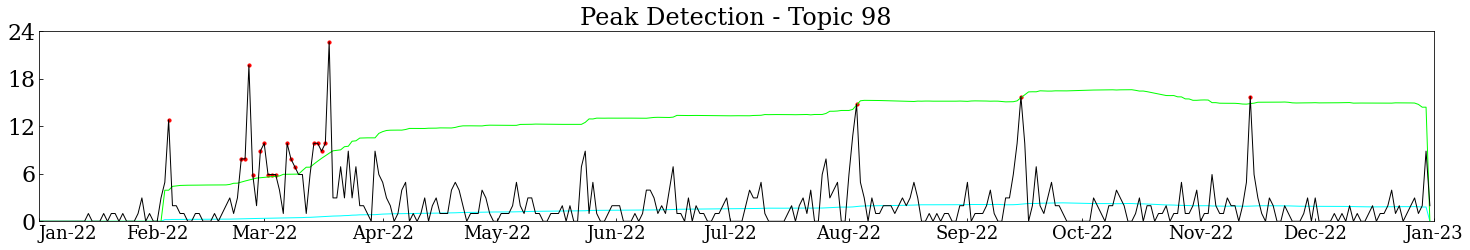

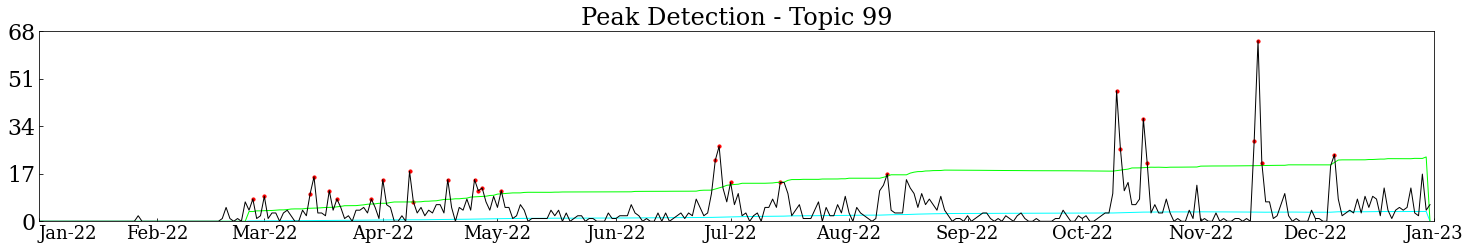

In [5]:

data_df = pd.read_csv(os.path.join(ROOT_DIR, "results_1", "All_Results.csv"), parse_dates=["Date"], index_col=["Date"])
data_df = data_df.drop(columns=["Title", "Text", "URL","Novelty","Resonance","Transience"])
data_df = pd.get_dummies(data_df, columns=['Topic'])
data_df = data_df.resample("D").sum()

for i in range(0,len(kwargs2["All"])):
    fig3 = peaks_plot("All",data_df,**kwargs2["All"][i])
    topic = kwargs2["All"][i]["topic"]
    #fig3.savefig(os.path.join(ROOT_DIR, "figures","peak_detection", f"peak_detection_topic_{topic}.svg"), format="svg", dpi=1000, bbox_inches="tight")